In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [2]:
data.generate_lorenz_63()

array([[ -8.68434527, -11.94232806,  23.0970829 ],
       [ -9.34603443, -12.67637139,  24.0632205 ],
       [-10.00770256, -13.25892154,  25.26373865],
       ...,
       [  1.90151071,   3.23924314,  16.68140927],
       [  2.18495662,   3.68876777,  15.9520563 ],
       [  2.50762815,   4.23740131,  15.3038531 ]])

In [3]:
data.generate_roessler()

array([[-2.02837641, -0.7998481 ,  0.00498438],
       [-2.01371291, -0.83773968,  0.00498755],
       [-1.99836854, -0.875429  ,  0.00499089],
       ...,
       [ 3.4598042 , -0.40289192,  0.00685738],
       [ 3.46638413, -0.34116251,  0.0068624 ],
       [ 3.47184973, -0.27921316,  0.00686692]])

In [4]:
lorenz_test = data.generate_lorenz_63()
lorenz_test_acf = acf.compute_acf(lorenz_test, "x", "x", l=1)
lorenz_test_acf

9069.919428531002

In [5]:
lorenz_test_acfs = acf.compute_acfs(lorenz_test, "x", "x")
lorenz_test_acfs

array([9.19566348e+03, 9.06991943e+03, 8.70982526e+03, 8.15296251e+03,
       7.45363675e+03, 6.67304948e+03, 5.86978219e+03, 5.09269269e+03,
       4.37717548e+03, 3.74461335e+03, 3.20413492e+03, 2.75557972e+03,
       2.39272745e+03, 2.10616897e+03, 1.88552245e+03, 1.72094343e+03,
       1.60402471e+03, 1.52824754e+03, 1.48915605e+03, 1.48440039e+03,
       1.51373322e+03, 1.57894794e+03, 1.68364420e+03, 1.83267408e+03,
       2.03121762e+03, 2.28359466e+03, 2.59200096e+03, 2.95532743e+03,
       3.36818433e+03, 3.82027677e+03, 4.29631973e+03, 4.77665617e+03,
       5.23861632e+03, 5.65846229e+03, 6.01358068e+03, 6.28450767e+03,
       6.45644617e+03, 6.52013552e+03, 6.47215740e+03, 6.31488708e+03,
       6.05626590e+03, 5.70942200e+03, 5.29201791e+03, 4.82516485e+03,
       4.33184722e+03, 3.83498960e+03, 3.35546995e+03, 2.91045018e+03,
       2.51232971e+03, 2.16846380e+03, 1.88159714e+03, 1.65081497e+03,
       1.47274797e+03, 1.34278251e+03, 1.25609735e+03, 1.20843515e+03,
      

In [6]:
roessler_test = data.generate_roessler()
roessler_test_acf = acf.compute_acf(roessler_test, "x", "x", l=1)
roessler_test_acf

24.68296817547959

In [7]:
roessler_test_acfs = acf.compute_acfs(roessler_test, "x", "x")
roessler_test_acfs

array([24.83610514, 24.68296818, 24.51983543, 24.34692211, 24.16445553,
       23.97267477, 23.77183026, 23.56218339, 23.34400616, 23.11758068,
       22.8831988 , 22.64116167, 22.39177923, 22.13536984, 21.87225972,
       21.60278253, 21.32727887, 21.04609578, 20.75958624, 20.46810867,
       20.17202642, 19.87170726, 19.56752283, 19.25984817, 18.94906116,
       18.635542  , 18.31967271, 18.00183657, 17.68241761, 17.3618001 ,
       17.040368  , 16.71850446, 16.39659132, 16.07500856, 15.75413383,
       15.43434195, 15.11600437, 14.79948874, 14.48515841, 14.17337194,
       13.86448266, 13.5588382 , 13.25678008, 12.95864322, 12.66475558,
       12.37543769, 12.0910023 , 11.81175397, 11.5379887 , 11.26999357,
       11.0080464 , 10.7524154 , 10.50335887, 10.26112492, 10.02595111,
        9.79806426,  9.57768015,  9.3650033 ,  9.16022671,  8.96353173,
        8.77508778,  8.59505224,  8.42357029,  8.26077474,  8.10678595,
        7.96171169,  7.8256471 ,  7.69867457,  7.58086373,  7.47

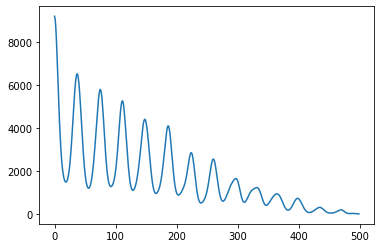

In [8]:
plt.figure(facecolor="white")

plt.plot(lorenz_test_acfs)

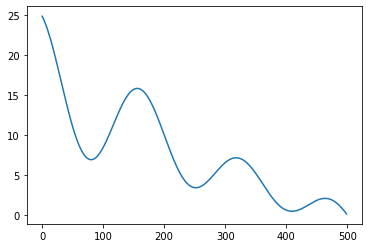

In [9]:
plt.figure(facecolor="white")

plt.plot(roessler_test_acfs)

In [10]:
lorenz_test.shape

(500, 3)

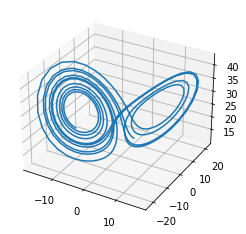

In [11]:
T, D = lorenz_test.shape
t_min = 0
t_max = T
fig = plt.figure(facecolor="white")
ax = plt.axes(projection="3d")
ax.plot(
    lorenz_test[t_min:t_max, 0],
    lorenz_test[t_min:t_max, 1],
    lorenz_test[t_min:t_max, 2]
)

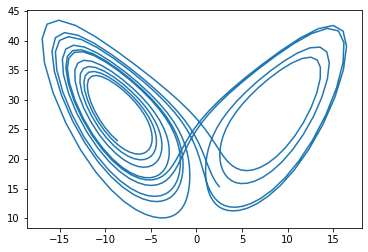

In [12]:
plt.figure(facecolor="white")
plt.plot(lorenz_test[t_min:t_max, 0], lorenz_test[t_min:t_max, 2])

In [13]:
seed = 42
A, W_in = res.generate_inputs(rho=0.5, s_in=0.5, R=50, D=3, seed=seed)
print(A.shape)
print(W_in.shape)

(50, 50)
(50, 3)


In [14]:
u_in = np.array([1, 2, 3])
W_in = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])
np.array(np.matmul(np.asmatrix(W_in), np.asmatrix(u_in).transpose())).flatten()
# np.asmatrix(u_in).transpose().shape

array([1, 2, 3, 6])

In [15]:
r_0 = np.zeros(10)
A, W_in = res.generate_inputs(rho=0.25, s_in=0.25, R=10, D=3, seed=seed)
u = data.generate_lorenz_63(steps=2000, washout=1500)

r = np.ndarray((u.shape[0], 10))
r[0] = r_0
for t in range(1, u.shape[0]):
    r[t] = res.next_res(r_prev=r[t-1], u_in=u[t-1], A=A, W_in=W_in, alpha=0.5)
r

TypeError: next_res() got an unexpected keyword argument 'alpha'

In [ ]:
plt.figure(facecolor="white")
for i in range(r.shape[1]):
    plt.plot(r[:, i])

In [ ]:
res_test, A, W_in = res.generate_reservoir(u, alpha=0.5, rho=0.25, s_in=0.25, R=10, seed=seed)

In [ ]:
plt.figure(facecolor="white")
plt.plot(res_test)

In [ ]:
sum((r - res_test) != 0)

In [ ]:
plt.figure(facecolor="white")
plt.plot(u)

In [ ]:
fig = plt.figure(facecolor="white")
ax = plt.axes(projection="3d")
ax.plot(u[:, 0], u[:, 1], u[:, 2])

In [ ]:
u_t = u[0]
r_t = res_test[1]
print(u_t)
print(r_t)
np.concatenate(([1], u_t, r_t), axis=0)

In [ ]:
ones = np.ones((u.shape[0], 1))
X = np.concatenate((ones, u, r), axis=1).transpose()

In [ ]:
X.shape

In [ ]:
W_out, r, A, W_in, alpha = res.train_p(u, alpha=1.03, rho=0.91, s_in=0.85, R=50, beta=5.3e-9, seed=seed)

In [ ]:
W_out.shape

In [ ]:
np.asmatrix(np.concatenate((r[t], r[t]**2))).shape

In [ ]:
in_sample_preds = np.array([np.matmul(np.concatenate((r[t], r[t]**2)), W_out) for t in range(u.shape[0])])

In [ ]:
in_sample_preds

In [ ]:
plt.figure(facecolor="white")
plt.plot(u)

In [ ]:
plt.figure(facecolor="white")
plt.plot(in_sample_preds)

In [ ]:
error.RMSE(u[1:], in_sample_preds[1:])

In [ ]:
u_tilde = np.ndarray((T, D))
u_tilde[0] = u[0]

In [ ]:
W_out, r, A, W_in, alpha = res.train_p(u, alpha=1.03, rho=0.91, s_in=0.85, R=50, beta=1e-6, seed=seed)
testing_preds = res.predict(u_0=u[0], W_out=W_out, T=u.shape[0], A=A, W_in=W_in, alpha=alpha)

In [ ]:
testing_preds

In [ ]:
plt.figure(facecolor="white")
plt.plot(testing_preds)

In [ ]:
error.RMSE(u, testing_preds)

In [ ]:
u = data.generate_lorenz_63()
R = 10
T = u.shape[0]
D = u.shape[1]
# A, W_in = res.generate_inputs(rho=0.5, s_in=0.5, R=R, D=D, seed=seed)
# r = np.ndarray((T, R))
# r[0] = np.zeros(R)
# r.shape
r, A, W_in = res.generate_reservoir(u, alpha=0.5, rho=0.5, s_in=0.5, R=R, seed=seed)
r.shape

In [ ]:
X = np.concatenate((r, r**2), axis=1)
X.shape